## Linear Regression
For this prediction, we will try out the following regression algorithm

1. Linear Regression
2. Polynomial Regression
3. Random Forest Regression
4. Support Vector Machine

First part of notebook deals with EDA 
<br> Second part of notebook deals with preprocessing/training </br> 

## ****Data****
* CRIM: capita crime rate by town
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town 
* CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise) 
* NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
* RM: average number of rooms per dwelling 
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to five Boston employment centres
*  RAD: index of accessibility to radial highways 
*  TAX: full-value property-tax rate per $10,000 [$/10k] 
*  PTRATIO: pupil-teacher ratio by town 
*  B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
*  LSTAT: % lower status of the population 
* MEDV: Median value of owner-occupied homes in $1000's [k$]

## Import Library

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 

#Read in data
df = pd.read_csv('/kaggle/input/the-boston-houseprice-data/boston.csv')
print(df.shape)
print('m: Number of training examples: ', df.shape[0])
print('n: Number of independent Variables: ', df.shape[1])
print('Target variable: MEDV')


(506, 14)
m: Number of training examples:  506
n: Number of independent Variables:  14
Target variable: MEDV


In [2]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Multi-variate Linear Regression and Matrix dimension
 h(theta) = regression line to predict future values
 <br> theta = parameters </br>
 <br> </br>
<br> $$\mathbf{ h_\theta(x_{i}) = \theta_0+\theta_1 CRIM + \theta_2 ZN + \theta_3 INDUS + \theta_4 CHAS + \theta_5 NOX + \theta_6 RM + ... }$$ </br>

<br> $$\mathbf{X} = \left( \begin{smallmatrix} x_{11} & x_{12} &.&.&.&.& x_{1n}\\
                                x_{21} & x_{22} &.&.&.&.& x_{2n}\\
                                x_{31} & x_{32} &.&.&.&.& x_{3n}\\
                                .&.&.&. &.&.&.& \\
                                .&.&.&. &.&.&.& \\
                                x_{m1} & x_{m2} &.&.&.&.&. x_{mn}\\
                                \end{smallmatrix} \right)_{(m,n)}$$ </br>
                                
$$\theta = \left (\begin{matrix} \theta_0 \\ \theta_1 \\ .\\.\\ \theta_j\\.\\.\\ \theta_n \end {matrix}\right)_{(n+1,1)} 
\mathbf{ y } = \left (\begin{matrix} y_1\\ y_2\\. \\. \\ y_i \\. \\. \\ y_m \end{matrix} \right)_{(m,1)}$$


#### Vectorized Form of hypothesis function
-> Vectorized implementation makes our code run faster 
$$\mathbf{ h_\theta{(x)} = X\theta}$$.

# Explore Data Analysis

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

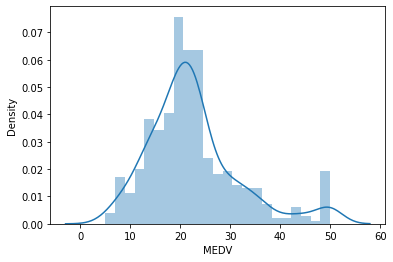

In [3]:
sns.distplot(df['MEDV'])

## Question 1: Does price increases as CRIME rate decreases ?

Text(0.5, 1.0, 'Crime rate vs owner-home value')

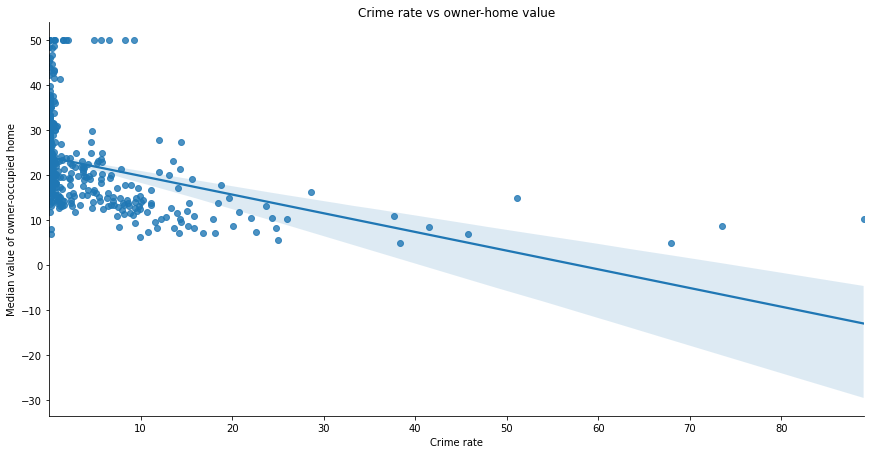

In [4]:

sns.lmplot(x='CRIM',y='MEDV',data=df,aspect=2,height=6)
plt.xlabel('Crime rate')
plt.ylabel('Median value of owner-occupied home')
plt.title('Crime rate vs owner-home value')

It seems like as crime rate goes to nearly 0, price of home increases.
<br> Safety of neighborhood increases price of owned-home. </br>

## Question 2: Does NOX has effect on price of home?

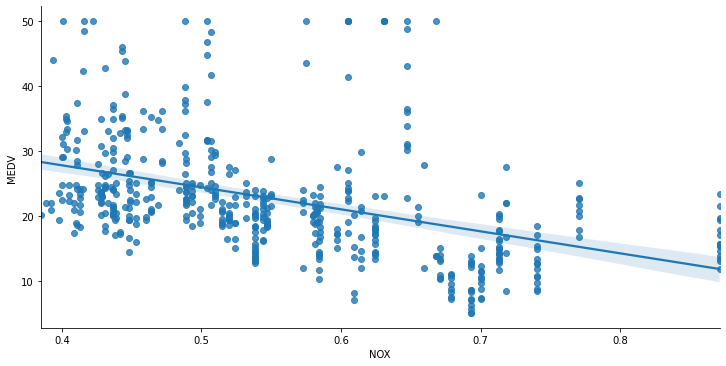

In [5]:
sns.lmplot(x='NOX', y='MEDV', data=df, aspect=2)

As Nitric oxide concentration increases, prices of home deceases.
<br> Since excessive nitric oxide is harmful to human body, it is unlikely to see people to move in a home with nearby high NOX. Therefore, price of home decreases.</br>

# Training Linear Regression Model
First, we will need to split our data into X and Y
<br> X is a matrix containing all columns(features) except 'MEDV' </br>
<br> Y is a column vector containing only 'MEDV' </br>


In [6]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

## Train test split
We will split our data into test set and training set.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score


def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# Preparing data for linear regression
* ****Linear Assumption****. Linear regression assumes that the relationship between your input and output is linear. It does not support anything else. This may be obvious, but it is good to remember when you have a lot of attributes. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).
* ****Remove Noise**** Linear regression assumes that your input and output variables are not noisy. Consider using data cleaning operations that let you better expose and clarify the signal in your data. This is most important for the output variable and you want to remove outliers in the output variable (y) if possible.
* ****Remove Collinearity****. Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.
* ****Gaussian Distributions****. Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution. You may get some benefit using transforms (e.g. log or BoxCox) on you variables to make their distribution more Gaussian looking.
* ****Rescale Inputs:**** Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.

In [9]:
####### Rescaling variables #######
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)




# 1. Linear Regression Algorithm

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

#### Model Evaluation

In [11]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-1.108346
ZN,0.808440
INDUS,0.343135
CHAS,0.813864
NOX,-1.798043
RM,2.913858
AGE,-0.298939
DIS,-2.942511
RAD,2.094193
TAX,-1.447067


****Note:**** coefficient are the values that multiply predict values

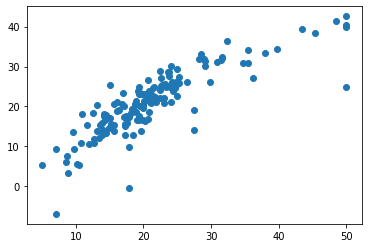

In [12]:
#Plotting our prediction
pred = lin_reg.predict(X_test)
plt.scatter(y_test, pred)
plt.show()


In [13]:
#Prediction on test/train sets
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3.1627098714574045
MSE: 21.517444231177205
RMSE: 4.6386899261728205
R2 Square 0.7112260057484934
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.3568267821682065
MSE: 22.545481487421423
RMSE: 4.748208239685937
R2 Square 0.7434997532004697
__________________________________


****OverFitting****: training MSE lower than testing MSE
<br>****UnderFitting****: very high MSE for testing MSE </br>

In [14]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,3.16271,21.517444,4.63869,0.711226


# 2. Polynomial Regression

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3.0649504691611162
MSE: 25.257540307734445
RMSE: 5.025688043217013
R2 Square 0.6610321968877308
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.6945117794034708
MSE: 4.660318639997245
RMSE: 2.158777116794887
R2 Square 0.9469794920108197
__________________________________


****This is example of overfitting. Polynomial regression tries so hard to fit data in training set, it leads to overfitting or not fitting
unseen data well****

In [16]:
results_df_2 = pd.DataFrame(data=[["Polynomial", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,3.16271,21.517444,4.638690,0.711226
1,Polynomial,3.06495,25.257540,5.025688,0.661032


# 3. Random Forest Algorithm

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 2.093508552631585
MSE: 9.552419075592104
RMSE: 3.090698800529114
R2 Square 0.8718021442701747
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.8983039548022541
MSE: 1.8885837144067605
RMSE: 1.3742575138622166
R2 Square 0.9785135576227468
__________________________________


In [18]:
results_df_3 = pd.DataFrame(data=[["Random Forest", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

results_df = results_df.append(results_df_3, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,3.162710,21.517444,4.638690,0.711226
1,Polynomial,3.064950,25.257540,5.025688,0.661032
2,Random Forest,2.093509,9.552419,3.090699,0.871802


# 4. Support Vector Machine Algorithm

In [19]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3.5451249446509867
MSE: 28.50170584312022
RMSE: 5.338698890471369
R2 Square 0.6174940038941119
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.001124699186135129
MSE: 1.680746487337255e-06
RMSE: 0.0012964360714424969
R2 Square 0.9999999808781246
__________________________________


Our R2 Square and MSE are excellent on training set, but it is terrible in test set. This is example of overfitting

In [20]:
results_df_4 = pd.DataFrame(data=[["Support Vector Machine", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

results_df = results_df.append(results_df_4, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,3.162710,21.517444,4.638690,0.711226
1,Polynomial,3.064950,25.257540,5.025688,0.661032
2,Random Forest,2.093509,9.552419,3.090699,0.871802
3,Support Vector Machine,3.545125,28.501706,5.338699,0.617494


# Comparing Models

<AxesSubplot:ylabel='Model'>

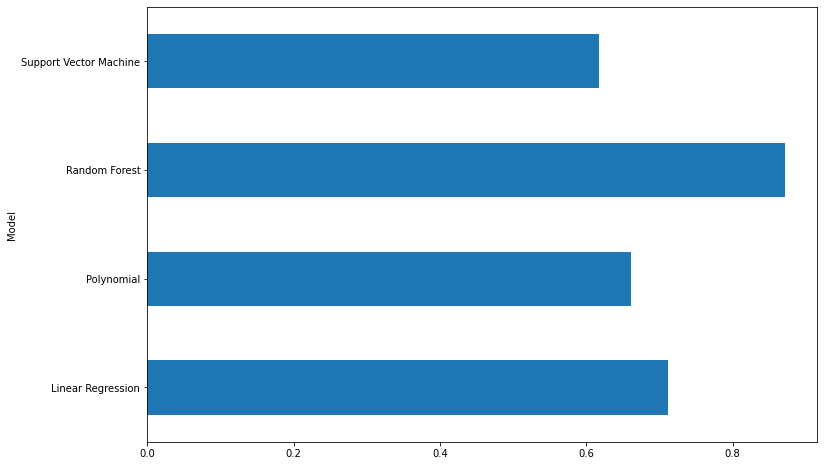

In [21]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8)) #barh stands for bar histogram 

# Summary

### Random Forest outperforms all other regression.
##### Comparing Linear Regression to Random Forest
<br> Random Forest performs better because it does not make the assumption of linear regression </br>
<br> CHAS features is a categorical variables with 0 and 1. Random Forest performs better than linear regression on such dataset.</br>